In [1]:
from HASS_data_detective import DataParser 
from helpers import load_url
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = '/Users/robincole/Desktop/hass_db_url.json'
DB_URL = load_url(filename)

## Load the complete db

In [3]:
%%time
parser = DataParser(DB_URL)

/Users/robincole/Documents/Github/HASS-data-detective/HASS_data_detective.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sensors_df['state'] = sensors_df['state'].astype('float')


CPU times: user 6.43 s, sys: 1.64 s, total: 8.07 s
Wall time: 3min 5s


In [4]:
parser.list_sensors

['sensor.bme680temperature',
 'sensor.bme680air_qual',
 'sensor.electric_charger_distance',
 'sensor.network_up',
 'sensor.bme680humidity',
 'sensor.bme680pressure',
 'sensor.darksky_sensor_precip_probability',
 'sensor.darksky_sensor_temperature',
 'sensor.blink_blink_camera_percy_temperature',
 'sensor.mean_temperature',
 'sensor.robins_iphone_battery_level',
 'sensor.blink_blink_camera_percy_notifications',
 'sensor.iphone_battery_level',
 'sensor.bayes_probability',
 'sensor.work_to_home',
 'sensor.home_to_work',
 'sensor.home_to_waterloo',
 'sensor.memory_usage_real',
 'sensor.volume_used_volume_1',
 'sensor.cpu_load_total',
 'sensor.hall_temperature',
 'sensor.living_room_temperature',
 'sensor.bedroom_temperature',
 'sensor.next_train_in',
 'sensor.speedtest_download',
 'sensor.next_train_to_wim',
 'sensor.time_in_bed',
 'sensor.homeassistant_v2db']

#### Plot a single sensor

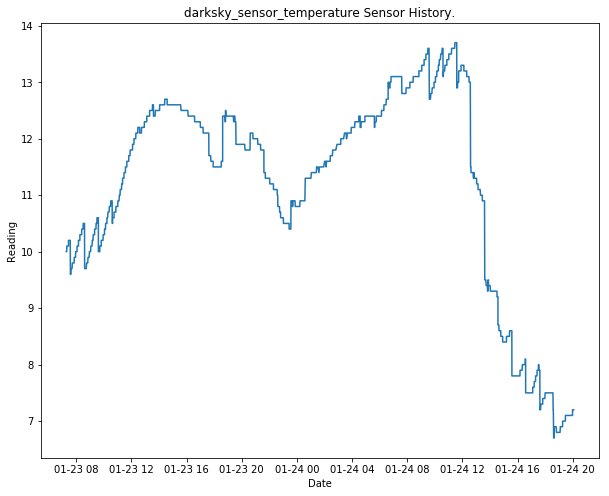

In [5]:
sensor = 'sensor.darksky_sensor_temperature'
parser.plot_sensor(sensor)

#### Pairplot

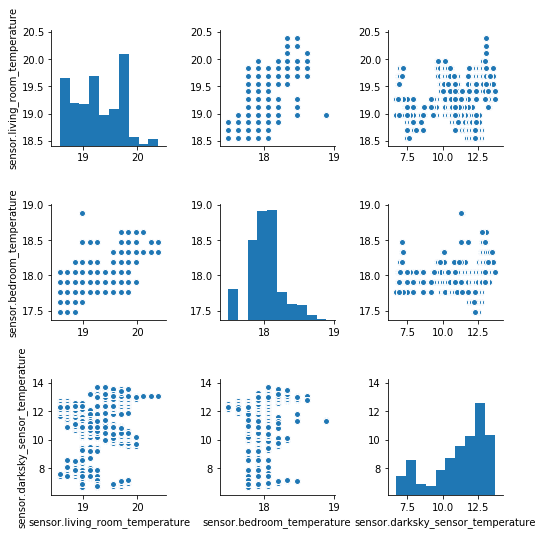

In [6]:
parser.sensor_pairplot(['sensor.living_room_temperature',
                        'sensor.bedroom_temperature',
                        'sensor.darksky_sensor_temperature'])

#### Prediction with prophet

In [7]:
sensor = 'sensor.darksky_sensor_temperature'
model, future = parser.prophet_model(sensor)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


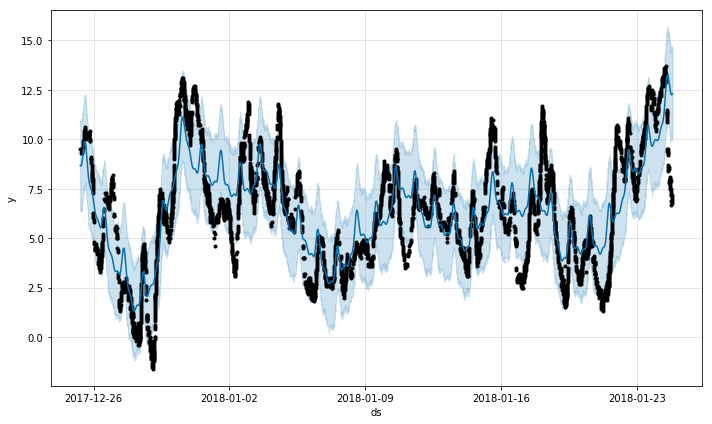

In [8]:
model.plot(future)
plt.show()

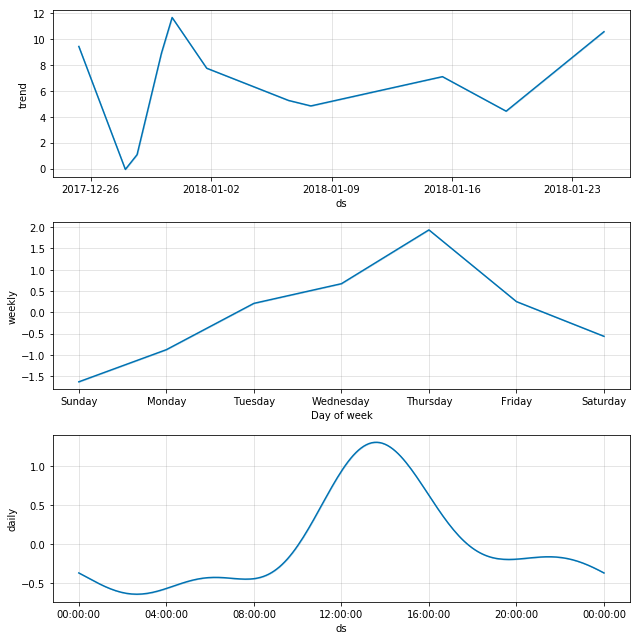

In [9]:
model.plot_components(future)
plt.show()

Clearly the daily trend is for the warmest temperatures at early afternoon